# Working with bible.txt

### Case folding & Tokenization

In [27]:
import string

text = ""

with open('bible.txt', 'r', encoding = 'utf-8') as file:
    text += file.read() + ' '

# Case folding
text = text.lower()

# Tokenization
def tokenizer(text):
    text = text.translate(str.maketrans('','',string.punctuation))
    token = text.split()
    return token

tokens = tokenizer(text)

### Zipf's law

In [28]:
# Rank and Freq of terms
rank = []
freq = []

# Calculate term frequency
def calculate_freq(tokens):
    term_freq = {}
    for term in tokens:
        if term in term_freq:
            term_freq[term] += 1
        else:
            term_freq[term] = 1

    # Descending order
    term_freq_desc = sorted(term_freq.items(), key=lambda x: x[1], reverse=True)


    for i in term_freq_desc:
        rank.append(i[0])
        freq.append(i[1])
    return rank and freq

calculate_freq(tokens)

[64306,
 51762,
 34847,
 13680,
 12927,
 12727,
 10421,
 9840,
 8997,
 8997,
 8854,
 8473,
 8234,
 7830,
 7378,
 7030,
 7011,
 6659,
 6624,
 6430,
 6144,
 6059,
 5637,
 5474,
 4600,
 4524,
 4443,
 4420,
 4368,
 4096,
 3999,
 3996,
 3983,
 3932,
 3911,
 3844,
 3826,
 3657,
 3530,
 2973,
 2835,
 2830,
 2776,
 2772,
 2750,
 2688,
 2650,
 2613,
 2565,
 2383,
 2370,
 2301,
 2264,
 2264,
 2169,
 2142,
 2093,
 2026,
 2024,
 2022,
 2015,
 1994,
 1972,
 1968,
 1853,
 1802,
 1800,
 1787,
 1771,
 1734,
 1718,
 1704,
 1690,
 1668,
 1653,
 1617,
 1616,
 1583,
 1511,
 1492,
 1466,
 1456,
 1445,
 1406,
 1404,
 1400,
 1395,
 1385,
 1356,
 1326,
 1262,
 1237,
 1236,
 1228,
 1210,
 1199,
 1179,
 1169,
 1163,
 1125,
 1070,
 1068,
 1065,
 1058,
 1056,
 1043,
 1011,
 1008,
 1006,
 987,
 986,
 983,
 979,
 973,
 971,
 962,
 949,
 938,
 929,
 917,
 916,
 911,
 906,
 896,
 884,
 879,
 874,
 874,
 869,
 863,
 859,
 838,
 835,
 830,
 830,
 812,
 811,
 801,
 784,
 764,
 764,
 755,
 750,
 738,
 725,
 724,
 720,
 7

### Plot - Zipf's law

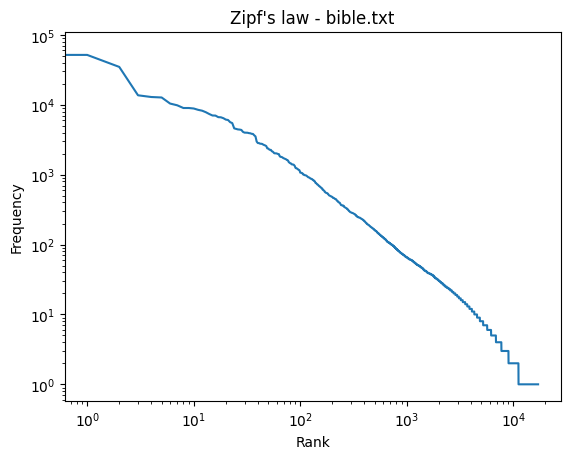

In [29]:
import matplotlib.pyplot as plt

plt.plot(rank, freq)
plt.title("Zipf's law - bible.txt")
plt.xlabel("Rank")
plt.ylabel("Frequency")

plt.loglog()
plt.show()

<strong>Report:</strong> From plot, Zipf's law shows that the frequency of any word is inversely proportional to its rank. The frequency of the most common element (rank 1) will be much higher than that of the second most common element (rank 2), and so forth.

### Heap's law

In [30]:
# Heap frequency
terms = []
counter = {}
counter_list = []
count = 0

# number of terms read so far
n = 0  

for word in tokens:
    if word in counter:
        counter[word] += 1
    else:
        counter[word] = 1
        count += 1
    terms.append(word)
    counter_list.append(count)
    n += 1

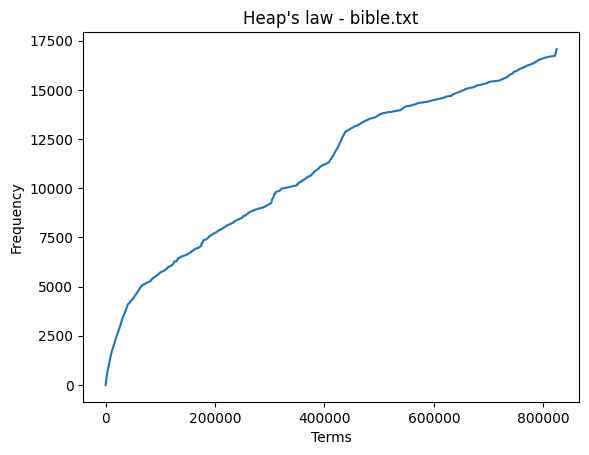

In [31]:
plt.plot(range(0, n), counter_list)

plt.title("Heap's law - bible.txt")
plt.xlabel("Terms")
plt.ylabel("Frequency")


plt.show()

### Stopping & Normalization

In [32]:
from nltk.stem import PorterStemmer

# Read stopwords from the stoplist file
stopwords = set()
with open('stoplist', 'r') as file:
    for line in file:
        word = line.strip()
        stopwords.add(word)

# Stopping - Remove custom stop words
filtered_tokens = []
for word in tokens:
    if word not in stopwords:
        filtered_tokens.append(word)

# Normalization - Perform Porter stemming
porter = PorterStemmer()
stemmed_tokens = []
for word in filtered_tokens:
    stemmed_tokens.append(porter.stem(word))
    
print(stemmed_tokens[:100])

['\ufeffthe', 'project', 'gutenberg', 'ebook', 'king', 'jame', 'version', 'bibl', 'ebook', 'is', 'use', 'anywher', 'unit', 'state', 'most', 'part', 'world', 'cost', 'restrict', 'may', 'copi', 'give', 'reus', 'term', 'project', 'gutenberg', 'licens', 'includ', 'ebook', 'onlin', 'wwwgutenbergorg', 'are', 'locat', 'unit', 'state', 'will', 'check', 'law', 'countri', 'are', 'locat', 'use', 'ebook', 'titl', 'king', 'jame', 'version', 'bibl', 'releas', 'date', 'august', '1', '1989', 'ebook', '10', 'most', 'recent', 'updat', 'may', '1', '2023', 'languag', 'english', 'start', 'project', 'gutenberg', 'ebook', 'king', 'jame', 'version', 'bibl', 'old', 'testament', 'king', 'jame', 'version', 'bibl', 'first', 'book', 'mose', 'call', 'genesi', 'second', 'book', 'mose', 'call', 'exodu', 'third', 'book', 'mose', 'call', 'leviticu', 'fourth', 'book', 'mose', 'call', 'number', 'fifth', 'book', 'mose']


### Save file

In [33]:
# Save preprocessed tokens to new files
with open('bible_preprocessed.txt', 'w', encoding='utf-8') as bible_file:
    bible_file.write(" ".join(stemmed_tokens))

# Working with quran.txt

### Case folding & Tokenization

In [34]:
text = ""

with open('quran.txt', 'r', encoding = 'utf-8') as file:
    text += file.read() + ' '

# Case folding
text = text.lower()

# Tokenization
tokens = tokenizer(text)

### Zipf's law

In [35]:
# Rank and Freq of terms
rank = []
freq = []

# Frequency and sort in Descending order
calculate_freq(tokens)

[7837,
 5778,
 4385,
 3662,
 3562,
 2829,
 2824,
 2739,
 2314,
 2231,
 2205,
 2139,
 2016,
 1820,
 1702,
 1695,
 1653,
 1616,
 1548,
 1379,
 1374,
 1297,
 1281,
 1281,
 1173,
 1170,
 1156,
 1055,
 1045,
 1026,
 950,
 945,
 906,
 837,
 835,
 800,
 719,
 710,
 653,
 619,
 614,
 582,
 545,
 529,
 520,
 516,
 513,
 492,
 488,
 485,
 475,
 468,
 459,
 454,
 440,
 434,
 409,
 404,
 380,
 378,
 370,
 367,
 363,
 347,
 345,
 345,
 340,
 331,
 324,
 322,
 322,
 316,
 298,
 295,
 294,
 287,
 279,
 278,
 274,
 265,
 265,
 263,
 257,
 247,
 246,
 242,
 234,
 234,
 233,
 232,
 229,
 223,
 222,
 221,
 213,
 213,
 209,
 204,
 200,
 197,
 196,
 193,
 192,
 191,
 190,
 189,
 184,
 181,
 180,
 179,
 175,
 173,
 166,
 162,
 159,
 159,
 158,
 158,
 157,
 157,
 156,
 155,
 154,
 152,
 152,
 150,
 149,
 149,
 148,
 144,
 143,
 143,
 142,
 141,
 141,
 138,
 137,
 134,
 134,
 134,
 132,
 131,
 130,
 129,
 129,
 128,
 128,
 127,
 127,
 126,
 125,
 124,
 123,
 119,
 119,
 117,
 117,
 117,
 116,
 116,
 115,
 115

### Plot - Zipf's law

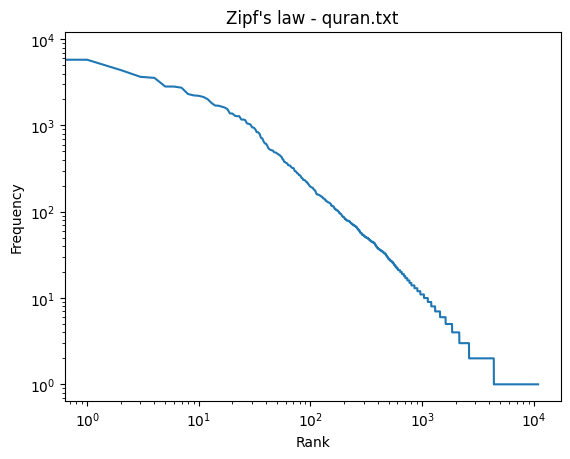

In [36]:
import matplotlib.pyplot as plt

plt.plot(rank, freq)
plt.title("Zipf's law - quran.txt")
plt.xlabel("Rank")
plt.ylabel("Frequency")

plt.loglog()
plt.show()

<strong>Report:</strong> From plot, Zipf's law shows similar behavior has it has shown for bible.txt that the frequency of any word is inversely proportional to its rank.

### Heap's law

In [37]:
# Heap frequency
terms = []
counter = {}
counter_list = []
count = 0

# number of terms read so far
n = 0  

for word in tokens:
    if word in counter:
        counter[word] += 1
    else:
        counter[word] = 1
        count += 1
    terms.append(word)
    counter_list.append(count)
    n += 1

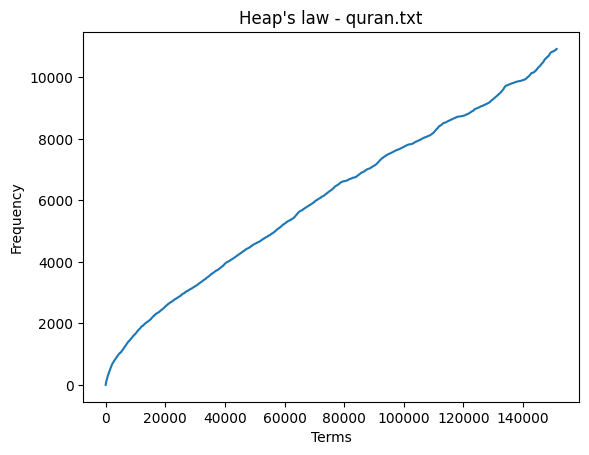

In [38]:
plt.plot(range(0, n), counter_list)

plt.title("Heap's law - quran.txt")
plt.xlabel("Terms")
plt.ylabel("Frequency")


plt.show()

### Stopping & Normalization

In [39]:
# Read stopwords from the stoplist file
stopwords = set()
with open('stoplist', 'r') as file:
    for line in file:
        word = line.strip()
        stopwords.add(word)

# Stopping - Remove custom stop words
filtered_tokens = []
for word in tokens:
    if word not in stopwords:
        filtered_tokens.append(word)

# Normalization - Perform Porter stemming
porter = PorterStemmer()
stemmed_tokens = []
for word in filtered_tokens:
    stemmed_tokens.append(porter.stem(word))
    
print(stemmed_tokens[:100])

['11', 'name', 'allah', 'merci', 'most', 'merci', '12', 'prais', 'allah', 'lord', 'world', '13', 'merci', 'most', 'merci', '14', 'owner', 'day', 'recompens', '15', 'alon', 'worship', 'alon', 'reli', 'help', '16', 'guid', 'straight', 'path', '17', 'path', 'favor', 'is', 'anger', 'astray', 'amen', 'pleas', 'answer', '21', 'aliflaammeem', '22', 'is', 'holi', 'book', 'is', 'doubt', 'is', 'guidanc', 'cautiou', 'evil', '23', 'believ', 'unseen', 'establish', 'daili', 'prayer', 'spend', 'provid', '24', 'believ', 'ha', 'been', 'sent', 'prophet', 'muhammad', 'ha', 'been', 'sent', 'prophet', 'jesu', 'mose', 'firmli', 'believ', 'everlast', 'life', '25', 'are', 'guid', 'lord', 'sure', 'are', 'prosper', '26', 'disbeliev', 'forewarn', 'will', 'believ', '27', 'allah', 'ha', 'set', 'seal', 'heart', 'ear', 'sight', 'is', 'dim', 'is', 'great', 'punish']


### Save file

In [40]:
with open('quran_preprocessed.txt', 'w', encoding='utf-8') as quran_file:
    quran_file.write(" ".join(stemmed_tokens))

# Working with amuzgo.txt

### Case folding & Tokenization

In [48]:
text = ""

for filename in ['amuzgo.txt']:
    with open(filename, 'r', encoding = 'utf-8') as file:
        text += file.read() + ' '

# Case folding
text = text.lower()

# Tokenization
tokens = tokenizer(text)

### Zipf's law

In [49]:
# Rank and Freq of terms
rank = []
freq = []

# Frequency and sort in Descending order
calculate_freq(tokens)

[1377,
 972,
 612,
 374,
 342,
 309,
 309,
 276,
 233,
 218,
 217,
 210,
 205,
 196,
 188,
 185,
 175,
 168,
 162,
 142,
 136,
 136,
 117,
 116,
 115,
 113,
 112,
 108,
 108,
 108,
 104,
 100,
 100,
 99,
 97,
 96,
 94,
 92,
 90,
 90,
 86,
 85,
 83,
 81,
 81,
 79,
 75,
 75,
 73,
 68,
 67,
 65,
 64,
 61,
 60,
 59,
 58,
 55,
 54,
 53,
 52,
 51,
 49,
 49,
 49,
 48,
 48,
 47,
 47,
 46,
 46,
 45,
 45,
 45,
 45,
 43,
 43,
 43,
 43,
 42,
 42,
 42,
 40,
 39,
 39,
 39,
 37,
 37,
 37,
 36,
 36,
 35,
 34,
 34,
 33,
 33,
 33,
 33,
 33,
 31,
 31,
 31,
 30,
 30,
 30,
 30,
 29,
 29,
 28,
 28,
 28,
 28,
 28,
 27,
 27,
 27,
 27,
 26,
 25,
 25,
 24,
 24,
 24,
 24,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 22,
 22,
 22,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 

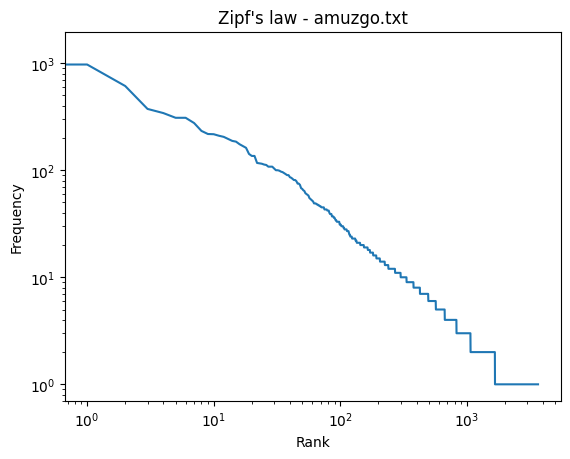

In [50]:
plt.plot(rank, freq)
plt.title("Zipf's law - amuzgo.txt")
plt.xlabel("Rank")
plt.ylabel("Frequency")

plt.loglog()
plt.show()

<strong>Report:</strong> From plot, Zipf's law shows similar behavior has it has shown for bible.txt that the frequency of any word is inversely proportional to its rank.

### Stopping & Normalization

In [51]:
# Read stopwords from the stoplist file
stopwords = set()
with open('stoplist', 'r') as file:
    for line in file:
        word = line.strip()
        stopwords.add(word)

# Stopping - Remove custom stop words
filtered_tokens = []
for word in tokens:
    if word not in stopwords:
        filtered_tokens.append(word)

# Normalization - Perform Porter stemming
porter = PorterStemmer()
stemmed_tokens = []
for word in filtered_tokens:
    stemmed_tokens.append(porter.stem(word))
    
print(stemmed_tokens[:100])

['toimi', 'pomeduncuduncu', 'mpomuliki', 'yesu', 'kristu', 'yesu', 'muli', 'magau', 'daud', 'muli', 'abraham', 'ngkai', 'abraham', 'rata', 'hi', 'daud', 'hanga', 'ntuana', 'yesu', 'toiramo', 'abraham', 'mpobubu', 'ishak', 'ishak', 'mpobubu', 'yakub', 'yakub', 'mpobubu', 'yehuda', 'pai', 'ompi', 'ompi', 'na', 'yehuda', 'mpobubu', 'pere', 'pai', 'zerah', 'hanga', 'tinara', 'tamar', 'pere', 'mpobubu', 'hezron', 'hezron', 'mpobubu', 'ram', 'ram', 'mpobubu', 'aminadab', 'aminadab', 'mpobubu', 'nahason', 'nahason', 'mpobubu', 'salmon', 'salmon', 'mpobubu', 'boa', 'hanga', 'tinana', 'rahab', 'boa', 'mpobubu', 'obe', 'hanga', 'tinana', 'rut', 'obe', 'mpobubu', 'isai', 'pai', 'isai', 'mpobubu', 'magau', 'daud', 'daud', 'mpobubu', 'salomo', 'tinana', 'baluna', 'uria', 'salomo', 'mpobubu', 'rehabeam', 'rehabeam', 'mpobubu', 'abia', 'abia', 'mpobubu', 'asa', 'asa', 'mpobubu', 'yosafat', 'yosafat', 'mpobubu', 'yoram', 'yoram', 'mpobubu', 'uzia']


### Save file

In [56]:
with open('amuzgo_preprocessed.txt', 'w', encoding='utf-8') as amuzgo_file:
    amuzgo_file.write(" ".join(stemmed_tokens))

# Working with maori.txt

### Case folding & Tokenization

In [52]:
text = ""

for filename in ['maori.txt']:
    with open(filename, 'r', encoding = 'utf-8') as file:
        text += file.read() + ' '

# Case folding
text = text.lower()

# Tokenization
tokens = tokenizer(text)

### Zipf's law

In [53]:
# Rank and Freq of terms
rank = []
freq = []

# Frequency and sort in Descending order
calculate_freq(tokens)

[2170,
 1789,
 1754,
 1369,
 1281,
 1090,
 868,
 815,
 720,
 666,
 616,
 591,
 445,
 385,
 383,
 378,
 333,
 265,
 251,
 236,
 234,
 222,
 220,
 218,
 216,
 215,
 202,
 189,
 180,
 179,
 162,
 157,
 155,
 154,
 153,
 151,
 151,
 149,
 130,
 130,
 130,
 128,
 125,
 122,
 119,
 119,
 117,
 117,
 104,
 100,
 99,
 96,
 93,
 89,
 88,
 86,
 86,
 85,
 82,
 82,
 81,
 81,
 77,
 75,
 74,
 73,
 71,
 70,
 66,
 65,
 65,
 64,
 61,
 61,
 59,
 59,
 58,
 54,
 54,
 54,
 52,
 51,
 51,
 51,
 50,
 49,
 48,
 48,
 47,
 47,
 45,
 45,
 44,
 44,
 44,
 44,
 44,
 43,
 43,
 42,
 42,
 41,
 41,
 41,
 41,
 40,
 40,
 40,
 39,
 39,
 39,
 39,
 39,
 38,
 38,
 38,
 38,
 37,
 37,
 37,
 37,
 36,
 36,
 36,
 35,
 35,
 35,
 35,
 35,
 35,
 34,
 34,
 34,
 33,
 32,
 32,
 32,
 31,
 30,
 30,
 30,
 30,
 29,
 28,
 28,
 28,
 28,
 27,
 27,
 26,
 26,
 26,
 26,
 25,
 25,
 25,
 25,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 22,
 22,
 22,
 22,
 21,
 21,
 21,
 21,
 21,
 20,
 20,
 20,
 20,
 20,
 20,
 20,

### Plot - Zipf's law

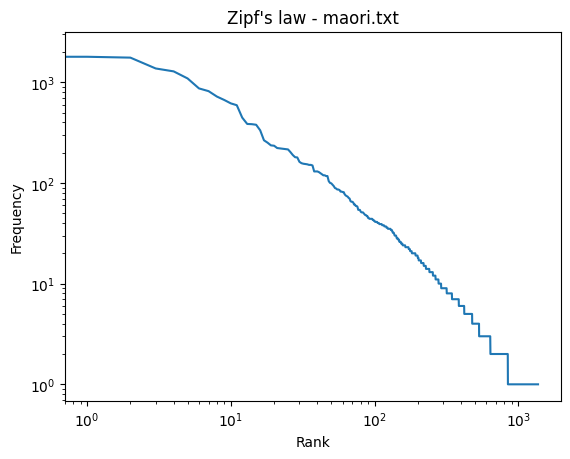

In [54]:
plt.plot(rank, freq)
plt.title("Zipf's law - maori.txt")
plt.xlabel("Rank")
plt.ylabel("Frequency")

plt.loglog()
plt.show()

<strong>Report:</strong> From plot, Zipf's law shows similar behavior has it has shown for bible.txt that the frequency of any word is inversely proportional to its rank.

### Stopping & Normalization

In [55]:
# Read stopwords from the stoplist file
stopwords = set()
with open('stoplist', 'r') as file:
    for line in file:
        word = line.strip()
        stopwords.add(word)

# Stopping - Remove custom stop words
filtered_tokens = []
for word in tokens:
    if word not in stopwords:
        filtered_tokens.append(word)

# Normalization - Perform Porter stemming
porter = PorterStemmer()
stemmed_tokens = []
for word in filtered_tokens:
    stemmed_tokens.append(porter.stem(word))
    
print(stemmed_tokens[:100])

['mea', 'hanga', 'na', 'te', 'atua', 'te', 'timatanga', 'te', 'rangi', 'te', 'whenua', 'kahor', 'ahua', 'te', 'whenua', 'takoto', 'kau', 'pouri', 'ano', 'runga', 'te', 'mata', 'te', 'hohonu', 'na', 'ka', 'whakapaho', 'te', 'wairua', 'te', 'atua', 'runga', 'te', 'kare', 'nga', 'wai', 'ka', 'ki', 'te', 'atua', 'kia', 'marama', 'na', 'ka', 'marama', 'ka', 'kite', 'te', 'atua', 'te', 'marama', 'pai', 'ka', 'wehea', 'e', 'te', 'atua', 'te', 'marama', 'te', 'pouri', 'na', 'ka', 'huaina', 'e', 'te', 'atua', 'te', 'marama', 'ko', 'te', 'awatea', 'ko', 'te', 'pouri', 'huaina', 'e', 'ia', 'ko', 'te', 'po', 'ko', 'te', 'ahiahi', 'ko', 'te', 'ata', 'ra', 'kotahi', 'na', 'ka', 'mea', 'te', 'atua', 'kia', 'whai', 'kikorangi', 'waenganui', 'nga', 'wai']


### Save file

In [57]:
with open('maori_preprocessed.txt', 'w', encoding='utf-8') as maori_file:
    maori_file.write(" ".join(stemmed_tokens))

# Report

### Comparing the processed file to the new file:

- The processed file appears to be a more concise version of the original text, with fewer spaces and blank gaps. Some words have been altered, such as "newsletter" becoming "newslett." 
- I've also noticed that many numbers are missing in the preprocessed version. 
- Consequently, performing statistical analysis on the preprocessed file may not be feasible. 
- Additionally, several crucial terms, including section numbers like 501(c)(3), are absent from the preprocessed file, which could be important for indexing or for anyone seeking specific references. 
- Nonetheless, the preprocessed file does seem quite concise and useful for various tasks.
- I also believe that there may be additional words that can still be filtered out and further normalization required for certain terms.

### Zipf's law:

- All the plots related to Zipf's law consistently demonstrate a trend where the frequency of any word is inversely proportional to its rank.
- In other words, the frequency of the most common element (rank 1) will be much higher than that of the second most common element (rank 2), and so forth.

### How do maori.txt and amuzgo.txt plots compare to other English collections?

- There isn't a significant difference among all the Zipf's law plots. 
- The only notable observation is that some exhibit a big range in both frequency and rank, as seen in 'bible.txt,' whereas others, like 'maori.txt,' have a low range.

<strong>Note:</strong> My code for processing 'wiki.txt' might not be running efficiently, possibly due to limitations with my system. Therefore, I have placed the code for 'wiki.txt' further down in this section.

# Working with wiki.txt

### Case folding & Tokenization

In [ ]:
text = ""

for filename in ['wiki.txt']:
    with open(filename, 'r', encoding = 'utf-8') as file:
        text += file.read() + ' '

# Case folding
text = text.lower()

# Tokenization
tokens = tokenizer(text)

### Zipf's law

In [ ]:
# Rank and Freq of terms
rank = []
freq = []

# Frequency and sort in Descending order
calculate_freq(tokens)

### Plot - Zipf's law

In [ ]:
plt.plot(rank, freq)
plt.title("Zipf's law - wiki.txt")
plt.xlabel("Rank")
plt.ylabel("Frequency")

plt.loglog()
plt.show()

### Heap's law

In [ ]:
# Heap frequency
terms = []
counter = {}
counter_list = []
count = 0

# number of terms read so far
n = 0  

for word in tokens:
    if word in counter:
        counter[word] += 1
    else:
        counter[word] = 1
        count += 1
    terms.append(word)
    counter_list.append(count)
    n += 1

In [ ]:
plt.plot(range(0, n), counter_list)

plt.title("Heap's law - wiki.txt")
plt.xlabel("Terms")
plt.ylabel("Frequency")


plt.show()

### Stopping & Normalization

In [ ]:
# Read stopwords from the stoplist file
stopwords = set()
with open('stoplist', 'r') as file:
    for line in file:
        word = line.strip()
        stopwords.add(word)

# Stopping - Remove custom stop words
filtered_tokens = []
for word in tokens:
    if word not in stopwords:
        filtered_tokens.append(word)

# Normalization - Perform Porter stemming
porter = PorterStemmer()
stemmed_tokens = []
for word in filtered_tokens:
    stemmed_tokens.append(porter.stem(word))
    
print(stemmed_tokens[:100])

### Save file

In [ ]:
with open('wiki_preprocessed.txt', 'w', encoding='utf-8') as wiki_file:
    wiki_file.write(" ".join(stemmed_tokens))

# END